In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Determine independent and dependent variables

In [4]:
X = df.drop(['math_score'], axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
for columns in df.loc[:, :'test_preparation_course']:
    print(f"Categories listed in {columns} variable: {df[columns].unique()}")

Categories listed in gender variable: ['female' 'male']
Categories listed in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories listed in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories listed in lunch variable: ['standard' 'free/reduced']
Categories listed in test_preparation_course variable: ['none' 'completed']


In [7]:
y=df['math_score']

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
cat_features = X.select_dtypes(include='O').columns
num_features = X.select_dtypes(exclude='O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
                ("OneHotEncoder", OneHotEncoder(), cat_features),
                ("StandardScaler", StandardScaler(), num_features)
            ])

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

__Creating and give evaluating function to train model__ 

In [20]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i ,model in enumerate(models.values()):
    #building model
    model.fit(X_train,y_train)
    
    #model predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #model Evaluations
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models.keys())[i])
    r2_list.append(test_r2)
    
    
    print(list(models.keys())[i])
    
    print("Model performance for training set")
    print("Mean absolute error: {:.4f}".format(train_mae))
    print("Root Mean squared error: {:.4f}".format(train_rmse))
    print("R2 score: {:.4f}".format(train_r2))
    
    print('-----------------------------------')
    
    print("Model performance for testing set")
    print("Mean absolute error: {:.4f}".format(test_mae))
    print("Root Mean squared error: {:.4f}".format(test_rmse))
    print("R2 score: {:.4f}".format(test_r2))
    
    print('='*35 + '\n')

Linear Regression
Model performance for training set
Mean absolute error: 4.2667
Root Mean squared error: 5.3231
R2 score: 0.8743
-----------------------------------
Model performance for testing set
Mean absolute error: 4.2148
Root Mean squared error: 5.3940
R2 score: 0.8804

Lasso
Model performance for training set
Mean absolute error: 5.2063
Root Mean squared error: 6.5938
R2 score: 0.8071
-----------------------------------
Model performance for testing set
Mean absolute error: 5.1579
Root Mean squared error: 6.5197
R2 score: 0.8253

Ridge
Model performance for training set
Mean absolute error: 4.2650
Root Mean squared error: 5.3233
R2 score: 0.8743
-----------------------------------
Model performance for testing set
Mean absolute error: 4.2111
Root Mean squared error: 5.3904
R2 score: 0.8806

K-Neighbors Regressor
Model performance for training set
Mean absolute error: 4.5122
Root Mean squared error: 5.7055
R2 score: 0.8556
-----------------------------------
Model performance fo

## Results

In [51]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852366
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.847142
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.755731


In [57]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("The accuracy of the model is: %.2f" %score)

The accuracy of the model is: 0.88


Text(0, 0.5, 'Predicted')

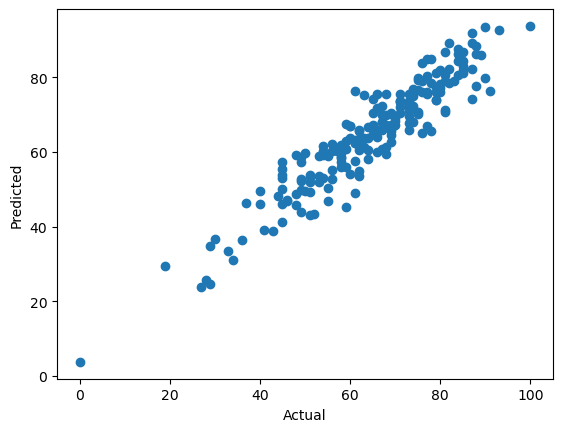

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot: xlabel='math_score'>

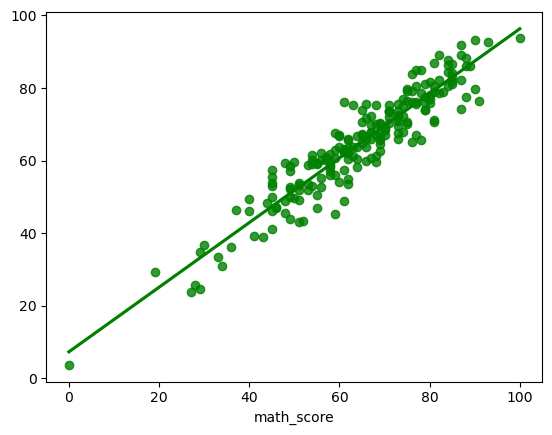

In [66]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='g')

__Difference between actual and predicted values__

In [69]:
df_prediction = pd.DataFrame({"actual_value":y_test, "predicted_value":y_pred, "Difference":y_test-y_pred})
df_prediction.head()

,actual_value,predicted_value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
